# Missing values in scikit-learn

In [55]:
#code adapted from https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2

## SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
import sklearn
sklearn.set_config(display='diagram')

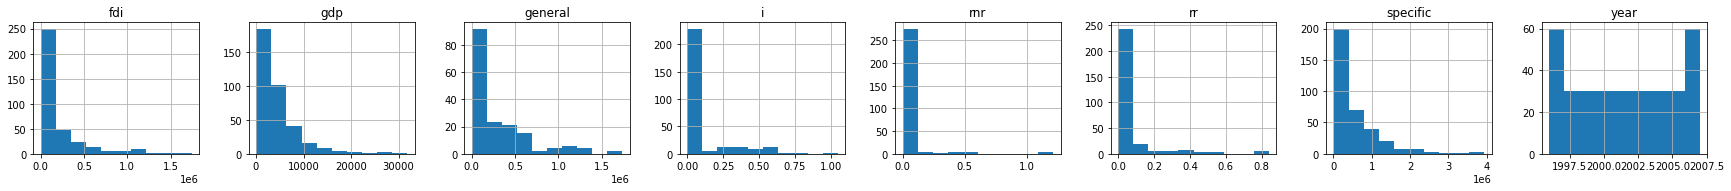

In [16]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split



df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['it', 'Unnamed: 0'], axis = 1), df['it']


X = X.select_dtypes(include='number')
X



_ = X.hist(figsize=(30, 15), layout=(5, 8))

In [17]:
df.isnull().sum()


Unnamed: 0      0
province        0
specific        4
general       191
year            0
gdp             0
fdi             0
rnr            66
rr             64
i              73
fr             65
reg             0
it              0
dtype: int64

### Default uses mean

In [18]:
imputer = SimpleImputer()
imputer.fit_transform(X)

array([[1.47002000e+05, 3.09127538e+05, 1.99600000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.51981000e+05, 3.09127538e+05, 1.99700000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.74930000e+05, 3.09127538e+05, 1.99800000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.56175000e+05, 3.09127538e+05, 2.00500000e+03, ...,
        1.21428571e+00, 3.57142860e-02, 3.57142860e-02],
       [1.01730300e+06, 3.94795000e+05, 2.00600000e+03, ...,
        1.21428571e+00, 3.57142860e-02, 3.57142860e-02],
       [8.44647000e+05, 0.00000000e+00, 2.00700000e+03, ...,
        4.76190480e-02, 0.00000000e+00, 0.00000000e+00]])

In [19]:
df.isnull().sum()

Unnamed: 0      0
province        0
specific        4
general       191
year            0
gdp             0
fdi             0
rnr            66
rr             64
i              73
fr             65
reg             0
it              0
dtype: int64

### Add indicator!

In [20]:
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(X)

array([[ 147002.        ,  309127.53846154,    1996.        , ...,
              0.        ,       0.        ,       0.        ],
       [ 151981.        ,  309127.53846154,    1997.        , ...,
              0.        ,       0.        ,       0.        ],
       [ 174930.        ,  309127.53846154,    1998.        , ...,
              0.        ,       0.        ,       0.        ],
       ...,
       [ 656175.        ,  309127.53846154,    2005.        , ...,
              0.        ,       0.        ,       0.        ],
       [1017303.        ,  394795.        ,    2006.        , ...,
              0.        ,       0.        ,       0.        ],
       [ 844647.        ,       0.        ,    2007.        , ...,
              0.        ,       0.        ,       0.        ]])

In [21]:
df.isnull().sum()

Unnamed: 0      0
province        0
specific        4
general       191
year            0
gdp             0
fdi             0
rnr            66
rr             64
i              73
fr             65
reg             0
it              0
dtype: int64

### Other strategies

In [22]:
imputer = SimpleImputer(strategy='median')
imputer.fit_transform(X)

array([[1.47002000e+05, 1.53640000e+05, 1.99600000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.51981000e+05, 1.53640000e+05, 1.99700000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.74930000e+05, 1.53640000e+05, 1.99800000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.56175000e+05, 1.53640000e+05, 2.00500000e+03, ...,
        1.21428571e+00, 3.57142860e-02, 3.57142860e-02],
       [1.01730300e+06, 3.94795000e+05, 2.00600000e+03, ...,
        1.21428571e+00, 3.57142860e-02, 3.57142860e-02],
       [8.44647000e+05, 0.00000000e+00, 2.00700000e+03, ...,
        4.76190480e-02, 0.00000000e+00, 0.00000000e+00]])

In [23]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X)

array([[1.47002000e+05, 0.00000000e+00, 1.99600000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.51981000e+05, 0.00000000e+00, 1.99700000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.74930000e+05, 0.00000000e+00, 1.99800000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.56175000e+05, 0.00000000e+00, 2.00500000e+03, ...,
        1.21428571e+00, 3.57142860e-02, 3.57142860e-02],
       [1.01730300e+06, 3.94795000e+05, 2.00600000e+03, ...,
        1.21428571e+00, 3.57142860e-02, 3.57142860e-02],
       [8.44647000e+05, 0.00000000e+00, 2.00700000e+03, ...,
        4.76190480e-02, 0.00000000e+00, 0.00000000e+00]])

## Categorical data

In [24]:
import pandas as pd

In [25]:
imputer = SimpleImputer(strategy='constant', fill_value='sk_missing')
imputer.fit_transform(df)

array([[0, 'Anhui', 147002.0, ..., '1128873', 'East China', 631930],
       [1, 'Anhui', 151981.0, ..., '1356287', 'East China', 657860],
       [2, 'Anhui', 174930.0, ..., '1518236', 'East China', 889463],
       ...,
       [357, 'Zhejiang', 656175.0, ..., 'sk_missing', 'East China',
        2370200],
       [358, 'Zhejiang', 1017303.0, ..., '11537149', 'East China',
        2553268],
       [359, 'Zhejiang', 844647.0, ..., '16494981', 'East China',
        2939778]], dtype=object)

## pandas categorical

In [ ]:
df['a'] = df['a'].astype('category')

In [26]:
df

,Unnamed: 0,province,specific,general,year,gdp,fdi,rnr,rr,i,fr,reg,it
0,0,Anhui,147002.0,NaN,1996,2093.30,50661,0.000000,0.000000,0.000000,1128873,East China,631930
1,1,Anhui,151981.0,NaN,1997,2347.32,43443,0.000000,0.000000,0.000000,1356287,East China,657860
2,2,Anhui,174930.0,NaN,1998,2542.96,27673,0.000000,0.000000,0.000000,1518236,East China,889463
3,3,Anhui,285324.0,NaN,1999,2712.34,26131,NaN,NaN,NaN,1646891,East China,1227364
4,4,Anhui,195580.0,32100.0,2000,2902.09,31847,0.000000,0.000000,0.000000,1601508,East China,1499110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,Zhejiang,391292.0,260313.0,2003,9705.02,498055,1.214286,0.035714,0.035714,6217715,East China,2261631
356,356,Zhejiang,656175.0,276652.0,2004,11648.70,668128,1.214286,0.035714,0.035714,NaN,East China,3162299
357,357,Zhejiang,656175.0,NaN,2005,13417.68,772000,1.214286,0.035714,0.035714,NaN,East China,2370200
358,358,Zhejiang,1017303.0,394795.0,2006,15718.47,888935,1.214286,0.035714,0.035714,11537149,East China,2553268


In [27]:
df.dtypes

Unnamed: 0      int64
province       object
specific      float64
general       float64
year            int64
gdp           float64
fdi             int64
rnr           float64
rr            float64
i             float64
fr             object
reg            object
it              int64
dtype: object

In [28]:
imputer.fit_transform(df)

array([[0, 'Anhui', 147002.0, ..., '1128873', 'East China', 631930],
       [1, 'Anhui', 151981.0, ..., '1356287', 'East China', 657860],
       [2, 'Anhui', 174930.0, ..., '1518236', 'East China', 889463],
       ...,
       [357, 'Zhejiang', 656175.0, ..., 'sk_missing', 'East China',
        2370200],
       [358, 'Zhejiang', 1017303.0, ..., '11537149', 'East China',
        2553268],
       [359, 'Zhejiang', 844647.0, ..., '16494981', 'East China',
        2939778]], dtype=object)

In [31]:
# %load solutions/03-ex01-solutions.py
from sklearn.datasets import fetch_openml

cancer = fetch_openml(data_id=15, as_frame=True)

X, y = cancer.data, cancer.target

X.shape

X.isna().sum()

imputer = SimpleImputer(add_indicator=True)
X_imputed = imputer.fit_transform(X)

X_imputed.shape

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y
)

log_reg = make_pipeline(
    SimpleImputer(add_indicator=True),
    StandardScaler(),
    LogisticRegression(random_state=0)
)

log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.96

## HistGradientBoosting Native support for missing values

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [33]:
hist = HistGradientBoostingClassifier(random_state=42)
hist.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [34]:
hist.score(X_test, y_test)

0.9485714285714286

## Grid searching the imputer

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [37]:
iris = pd.read_csv('data/iris_w_missing.csv')

In [38]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.4,2.9,4.3,1.3,1
1,5.7,2.8,4.1,1.3,1
2,6.8,2.8,NaN,1.4,1
3,6.7,3.3,5.7,2.1,2
4,4.8,3.4,1.6,0.2,0


In [39]:
X = iris.drop('target', axis='columns')
y = iris['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, stratify=y
)

In [41]:
pipe = Pipeline([
    ('imputer', SimpleImputer(add_indicator=True)),
    ('rf', RandomForestClassifier(random_state=42))
])

## scikit-learn uses `get_params` to find names

In [42]:
pipe.get_params()

{'memory': None,
 'steps': [('imputer', SimpleImputer(add_indicator=True)),
  ('rf', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'imputer': SimpleImputer(add_indicator=True),
 'rf': RandomForestClassifier(random_state=42),
 'imputer__add_indicator': True,
 'imputer__copy': True,
 'imputer__fill_value': None,
 'imputer__missing_values': nan,
 'imputer__strategy': 'mean',
 'imputer__verbose': 0,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': 42,
 'rf__verbose': 0,
 'rf__warm_start': False}

## Is it better to add the indicator?

In [43]:
from sklearn.model_selection import GridSearchCV

params = {
    'imputer__add_indicator': [True, False]
}

grid_search = GridSearchCV(pipe, param_grid=params, verbose=1)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


GridSearchCV(estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(add_indicator=True)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'imputer__add_indicator': [True, False]}, verbose=1)

In [45]:
grid_search.best_params_

{'imputer__add_indicator': True}

In [46]:
grid_search.best_score_

0.8837944664031621

In [47]:
grid_search.score(X_test, y_test)

0.9473684210526315

## Compare to `make_pipeline`

In [48]:
from sklearn.pipeline import make_pipeline

pipe2 = make_pipeline(SimpleImputer(add_indicator=True),
                     RandomForestClassifier(random_state=42))

In [49]:
pipe2.get_params()

{'memory': None,
 'steps': [('simpleimputer', SimpleImputer(add_indicator=True)),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'simpleimputer': SimpleImputer(add_indicator=True),
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'simpleimputer__add_indicator': True,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'mean',
 'simpleimputer__verbose': 0,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_impurity_split': None,
 'randomforestclassi

## Which imputer to use?

In [50]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

params = {
    'imputer': [
        SimpleImputer(strategy='median', add_indicator=True),
        SimpleImputer(strategy='mean', add_indicator=True),
        KNNImputer(add_indicator=True),
        IterativeImputer(estimator=RandomForestRegressor(random_state=42),
                         random_state=42, add_indicator=True)]
}

search_cv = GridSearchCV(pipe, param_grid=params, verbose=1, n_jobs=-1)

In [51]:
search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.8s finished


GridSearchCV(estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(add_indicator=True)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'imputer': [SimpleImputer(add_indicator=True,
                                                   strategy='median'),
                                     SimpleImputer(add_indicator=True),
                                     KNNImputer(add_indicator=True),
                                     IterativeImputer(add_indicator=True,
                                                      estimator=RandomForestRegressor(random_state=42),
                                                      random_state=42)]},
             verbose=1)

In [52]:
search_cv.best_params_

{'imputer': KNNImputer(add_indicator=True)}

In [53]:
search_cv.best_score_

0.9102766798418973

In [54]:
search_cv.score(X_test, y_test)

0.9736842105263158